In [1]:
# import libraries:
import pandas as pd
import os
import random
import shutil

In [ ]:
# importing the label in csv
cfar_data = pd.read_csv("Assignment_2/trainLabels.csv")

# putting into dataframe
cfar_dataframe = pd.DataFrame(cfar_data)


## cheaking file:
cfar_dataframe.head(2)

In [ ]:
## assigning destination path:
destination_image_dataset_dir = "Assignment_2/cfar_10_training/"
current_train_data_path = "Assignment_2/cfar_10_train_dataset/"
total_images = len(cfar_dataframe)
total_images

In [ ]:
# Distributing images according to their label folders:

for i in range((total_images)):
    source_full_image_path = f"{current_train_data_path}{cfar_dataframe.id[i]}.png"
    destination_full_image_path = f"{destination_image_dataset_dir}{cfar_dataframe.label[i]}"
    
    # make destination folder:
    os.makedirs(destination_full_image_path,exist_ok = "True")
    # move file from source to destination (in their name folders):
    shutil.move(source_full_image_path,destination_full_image_path)

In [ ]:
# distributing the data into train and validation data:


dir_folder=os.listdir(destination_image_dataset_dir)
# create the train path:
train_path = "Assignment_2/cfar_10_new_dataset/train_data/"
os.makedirs(train_path, exist_ok=True)
# create the test path:
validation_path = "Assignment_2/cfar_10_new_dataset/validation_data/"
os.makedirs(validation_path, exist_ok=True)


# getting label for prediction:
cfar_labels =[]
for i in range(len(dir_folder)):
    cfar_labels.append(dir_folder[i])
    
    
    
# getting labelpath dir:
cfar_label_path = []
for dirpath, dirnames, filenames in os.walk(destination_image_dataset_dir):
        cfar_label_path.append(dirpath)
        
# getting label under their respective labels:
cfar_label_path = cfar_label_path[1:]


# distribution of images to train and validation floder :
for i in range(len(cfar_labels)):
    filename = []
    #print(cfar_label_path[i])
    dirname = cfar_label_path[i]
    filename.append(os.listdir(dirname))
    filename = filename[0]
    
    ## creating train path 
    train_destination_dir = f"{train_path}{cfar_labels[i]}"    
    os.makedirs(train_destination_dir,exist_ok=True)
    
    #creating  validation path
    validation_destination_dir = f"{validation_path}{cfar_labels[i]}"
    os.makedirs(validation_destination_dir,exist_ok=True)
    
    for j in range(len(filename)):
        ## distributing file into train and validation folders as total images are 1000/folder
        # so if in train dir x folder less than 550 then move here,
        if len(os.listdir(train_destination_dir)) != 3000: #round(5000 *60 /100):            
            shutil.move(f"{dirname}/{filename[j]}",train_destination_dir)
            
        else:
            shutil.move(f"{dirname}/{filename[j]}",validation_destination_dir)

In [2]:
## now we have train and validation dir as:
train_path = "Assignment_2/cfar_10_new_dataset/train_data/"
validation_path = "Assignment_2/cfar_10_new_dataset/validation_data/"

# train path:
print(train_path)
# validation path:
print(validation_path)

Assignment_2/cfar_10_new_dataset/train_data/
Assignment_2/cfar_10_new_dataset/validation_data/


#### let's check the train imaged with label:

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np  
import random

# randomly choose any item:
r = random.choice(range(len(os.listdir(train_path))))
item = os.listdir(train_path)[r]
random_path = f"{train_path}/{item}"

# randomly choose any image of selected item
image = os.listdir(random_path)[r]
# image path decribe
image_path= f"{random_path}/{image}"
## converting the image intp float:
random_image = plt.imread(image_path)
## checking shape:
print(f"shape of image :{random_image.shape}\n")
print(f"image dimension :{np.ndim(random_image)}\n")

print(f"{random_image}\n")

shape of image :(64, 64, 3)

image dimension :3

[[[0.4        0.3647059  0.34117648]
  [0.4        0.37254903 0.3529412 ]
  [0.39607844 0.3764706  0.34509805]
  ...
  [0.6039216  0.6431373  0.5529412 ]
  [0.53333336 0.57254905 0.49411765]
  [0.5019608  0.54901963 0.4745098 ]]

 [[0.40392157 0.37254903 0.34901962]
  [0.40784314 0.37254903 0.35686275]
  [0.39607844 0.37254903 0.34901962]
  ...
  [0.5764706  0.60784316 0.5058824 ]
  [0.52156866 0.5568628  0.4627451 ]
  [0.50980395 0.5294118  0.45490196]]

 [[0.4117647  0.37254903 0.3529412 ]
  [0.41960785 0.38039216 0.36078432]
  [0.40784314 0.38039216 0.35686275]
  ...
  [0.5137255  0.53333336 0.4392157 ]
  [0.49411765 0.5058824  0.42745098]
  [0.49803922 0.49411765 0.43137255]]

 ...

 [[0.40784314 0.39215687 0.32941177]
  [0.4        0.38431373 0.31764707]
  [0.38039216 0.3647059  0.29411766]
  ...
  [0.39607844 0.40784314 0.29803923]
  [0.41960785 0.4392157  0.32156864]
  [0.43529412 0.44313726 0.34117648]]

 [[0.39607844 0.4        

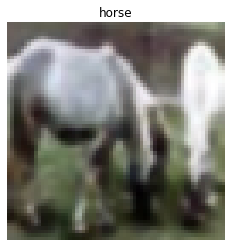

In [4]:
## plot image with item name:
plt.imshow(random_image)
plt.title(item)
plt.axis(False);

🔑 Note:

In [5]:
## since the images are not in desired shape we will precess image in different shape
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                horizontal_flip = True,
                                                                vertical_flip=True,
                                                                )

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)



# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_path,
                                             shuffle=True,
                                             target_size=(64,64),
                                             class_mode='categorical',
                                             batch_size=32)

valid_data = validation_datagen.flow_from_directory(validation_path,
                                             shuffle=True,
                                             target_size=(64,64),
                                             class_mode='categorical',
                                             batch_size=32,
                                             )


Found 30000 images belonging to 10 classes.
Found 20000 images belonging to 10 classes.


In [6]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [16]:
print(labels[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Get the first two images
images[:2], images[0].shape
     

(array([[[[0.15579827, 0.15908907, 0.17039973],
          [0.15461989, 0.16162367, 0.1739691 ],
          [0.16076487, 0.16469617, 0.17646271],
          ...,
          [0.33200115, 0.34830913, 0.35927013],
          [0.3246984 , 0.33762145, 0.34876445],
          [0.3142809 , 0.33240294, 0.34453353]],
 
         [[0.15294118, 0.15100582, 0.16277052],
          [0.15346728, 0.15508582, 0.16663621],
          [0.16077004, 0.16468711, 0.17326255],
          ...,
          [0.3432292 , 0.36189708, 0.3642415 ],
          [0.33890143, 0.35163206, 0.35933435],
          [0.32891318, 0.34437487, 0.35548577]],
 
         [[0.15954554, 0.1526476 , 0.16398862],
          [0.1621148 , 0.15662313, 0.16524082],
          [0.16078532, 0.16469987, 0.17254357],
          ...,
          [0.35153636, 0.3710896 , 0.37423453],
          [0.35055935, 0.36337978, 0.37325755],
          [0.34107685, 0.35596514, 0.36756068]],
 
         ...,
 
         [[0.8021982 , 0.76624197, 0.75215274],
          [0.79761

In [24]:
## setting the model layers:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(5,5),activation = "relu", input_shape = (64,64,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu"),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    #28
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    #10,52
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.Conv2D(64,(4,4),activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    #61
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax"),
    
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 60, 60, 16)        1216      
                                                                 
 conv2d_45 (Conv2D)          (None, 58, 58, 16)        2320      
                                                                 
 conv2d_46 (Conv2D)          (None, 56, 56, 16)        2320      
                                                                 
 batch_normalization_12 (Ba  (None, 56, 56, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 26, 26, 32)       

In [26]:
## setting callback function:
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

## creating the callback functions:
time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
 
#checkpoint:
checkpointer = ModelCheckpoint(filepath= f"{time}_cfar_10_agu_model.weights.best.hdf5",
                               verbose=1,save_best_only=True)


Earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,verbose=2)

callbacks=[checkpointer,Earlystop]

In [27]:
# compiling the model:

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

## fitting the model:

history=model.fit(train_data,validation_data=valid_data,
                  validation_steps=int(len(valid_data)),
                  steps_per_epoch=int(len(train_data)),
                  batch_size=32,
                  epochs=20,
                  callbacks=callbacks) 


Epoch 1/20
938/938 [==============================] - ETA: 0s - loss: 1.9199 - accuracy: 0.2828
Epoch 1: val_loss improved from inf to 2.72292, saving model to 20230723-221106_cfar_10_agu_model.weights.best.hdf5


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 701s 732ms/step - loss: 1.9199 - accuracy: 0.2828 - val_loss: 2.7229 - val_accuracy: 0.2386
Epoch 2/20
938/938 [==============================] - ETA: 0s - loss: 1.6313 - accuracy: 0.4016
Epoch 2: val_loss improved from 2.72292 to 1.66652, saving model to 20230723-221106_cfar_10_agu_model.weights.best.hdf5
938/938 [==============================] - 735s 783ms/step - loss: 1.6313 - accuracy: 0.4016 - val_loss: 1.6665 - val_accuracy: 0.4087
Epoch 3/20
938/938 [==============================] - ETA: 0s - loss: 1.4887 - accuracy: 0.4600
Epoch 3: val_loss improved from 1.66652 to 1.45769, saving model to 20230723-221106_cfar_10_agu_model.weights.best.hdf5
938/938 [==============================] - 736s 783ms/step - loss: 1.4887 - accuracy: 0.4600 - val_loss: 1.4577 - val_accuracy: 0.4637
Epoch 4/20
938/938 [==============================] - ETA: 0s - loss: 1.3882 - accuracy: 0.5025
Epoch 4: val_loss improved from 1.45769 to 1.30314, saving model to

In [34]:
model.evaluate(valid_data)
#20230723-221106_cfar_10_agu_model.weights.best.hdf5

625/625 [==============================] - 95s 151ms/step - loss: 1.0408 - accuracy: 0.6324


[1.0408122539520264, 0.6323999762535095]

# model_2

In [35]:
model_2 = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="LeakyReLU",input_shape=(64,64,3)),
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),
tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding ="same" ,activation="LeakyReLU"),
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),
tf.keras.layers.Conv2D(128, kernel_size=(3,3),padding ="same" ,activation="LeakyReLU"),
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),
tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding ="same" ,activation="LeakyReLU"),
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),


tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation='softmax'), ])


model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 8, 8, 128)        

In [36]:
## setting callback function:
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

## creating the callback functions:
time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
 
#checkpoint:
checkpointer = ModelCheckpoint(filepath= f"{time}_cfar_10_agu_model_2.weights.best.hdf5",
                               verbose=1,save_best_only=True)


Earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,verbose=2)

callbacks=[checkpointer,Earlystop]

In [37]:
# compiling the model:

model_2.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

## fitting the model:

history_2 = model_2.fit(train_data,validation_data=valid_data,
                  validation_steps=int(len(valid_data)),
                  steps_per_epoch=int(len(train_data)),
                  batch_size=32,
                  epochs=20,
                  callbacks=callbacks) 

Epoch 1/20
938/938 [==============================] - ETA: 0s - loss: 1.6330 - accuracy: 0.4061
Epoch 1: val_loss improved from inf to 1.29980, saving model to 20230724-152503_cfar_10_agu_model_2.weights.best.hdf5
938/938 [==============================] - 912s 920ms/step - loss: 1.6330 - accuracy: 0.4061 - val_loss: 1.2998 - val_accuracy: 0.5378
Epoch 2/20
938/938 [==============================] - ETA: 0s - loss: 1.2497 - accuracy: 0.5626
Epoch 2: val_loss improved from 1.29980 to 1.09465, saving model to 20230724-152503_cfar_10_agu_model_2.weights.best.hdf5
938/938 [==============================] - 483s 514ms/step - loss: 1.2497 - accuracy: 0.5626 - val_loss: 1.0946 - val_accuracy: 0.6098
Epoch 3/20
938/938 [==============================] - ETA: 0s - loss: 1.0897 - accuracy: 0.6178
Epoch 3: val_loss improved from 1.09465 to 1.00252, saving model to 20230724-152503_cfar_10_agu_model_2.weights.best.hdf5
938/938 [==============================] - 483s 515ms/step - loss: 1.0897 - accu

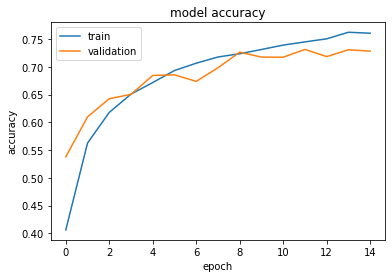

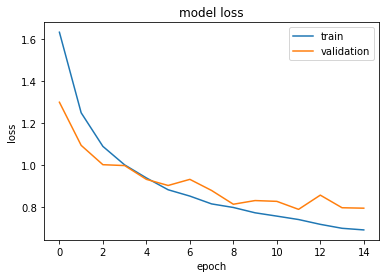

In [179]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Loading model:

In [41]:
load_model = tf.keras.models.load_model("20230724-152503_cfar_10_agu_model_2.weights.best.hdf5")

### Calculate the Classification Accuracy on the vlaidation set and Test Set


In [43]:
#evaluate validation accuracy:
val_score = load_model.evaluate(valid_data, verbose=0)
val_accuracy = 100*val_score[1]
# print test accuracy
print('validation accuracy: %.4f%%' % val_accuracy)


validation accuracy: 73.1250%


## let's make some prediction

In [62]:
## calling test file:
test_file_path = "Assignment_2/cfar_10_test/"

In [168]:
### total number of classification inside test_file_path
test_file_labels = os.listdir(test_file_path)

#calling random label folder:
randum = random.choice(test_file_labels)
print("actual:", randum)
# from randum selected folder calling on all images
image_path = f"{test_file_path}{randum}"
image_path_file_call = os.listdir(image_path)

# from image_path randomly calling  select on image:
randum_image = random.choice(range(len(image_path_file_call)))

# random image:
image = f"{image_path}/{image_path_file_call[randum_image]}"
# print image
image = plt.imread(image)
print(image.shape)

actual: truck
(64, 64, 3)


In [169]:
image_dimension_expansion = tf.expand_dims(image, axis=0)
print(image_dimension_expansion.shape)
pred_image = load_model.predict(image_dimension_expansion)

(1, 64, 64, 3)
1/1 [==============================] - 0s 53ms/step


In [170]:
## reduced the dimesion:
x = tf.reshape(pred_image, [-1])
x = tf.argmax(x)
# predicted label:
pred_label=test_file_labels[x]


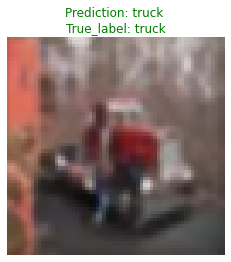

In [173]:
if pred_label== randum: # randum is actual_label
    color="green"
else :
    color="red"
plt.imshow(image)
plt.title("Prediction: {} \nTrue_label: {}".format(pred_label, randum),color=color,size=12)
plt.axis(False);